In [16]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib
plt.figure(figsize = (8,8))

In [17]:
#https://github.com/GeorgeMcIntire/fake_real_news_dataset
# https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv
#https://www.datacamp.com/community/tutorials/scikit-learn-fake-news

datacamp_news = pd.read_csv("../fake_news/data/data_camp_news_fake_or_real.csv")
del datacamp_news["Unnamed: 0"]
print datacamp_news.shape
datacamp_news.head()
datacamp_news = datacamp_news[datacamp_news.text != " "]


(6335, 3)


In [18]:
# split data
doc_clean = datacamp_news.text
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train, y_test = train_test_split(doc_clean, datacamp_news.label, test_size = .33)

# TFIDF model

In [45]:
# tfidf model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=no_features, stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

tfidf_test = tfidf_vectorizer.transform(X_test)


tfidf_traindf = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_testdf = pd.DataFrame(tfidf_test.A, columns = tfidf_vectorizer.get_feature_names())

## Naive Bayes:

In [46]:

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)


print("accuracy:   %0.3f" % score)
cr = metrics.classification_report(y_test, pred, labels=['FAKE', 'REAL'])

print cr

cm = metrics.confusion_matrix(y_test, pred, labels=["FAKE","REAL"])
pd.DataFrame(cm)

accuracy:   0.853
             precision    recall  f1-score   support

       FAKE       0.84      0.88      0.86      1056
       REAL       0.87      0.83      0.85      1023

avg / total       0.85      0.85      0.85      2079



0    1
0  927  129
1  176  847

In [47]:
y_test_bin = y_test.apply(lambda val: 0 if val == "REAL" else 1)

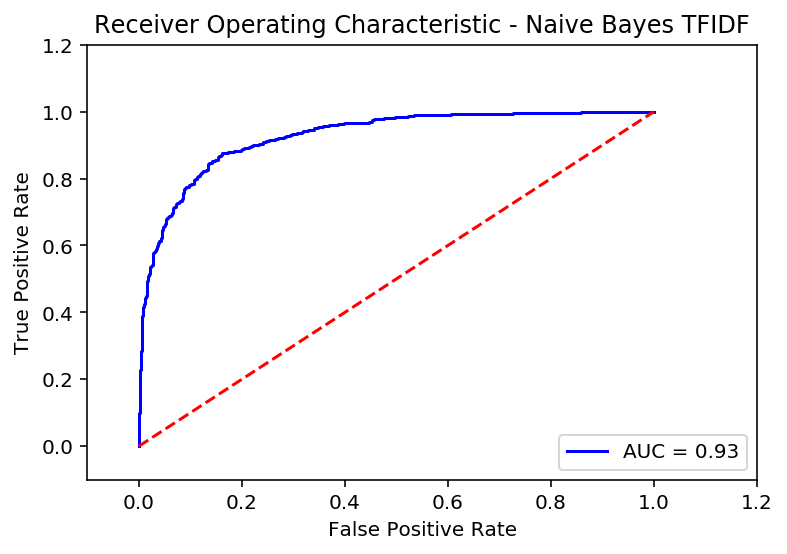

In [48]:
 
from sklearn.metrics import roc_curve, auc
 
# you don't want the predictions/labels
# you want predicted probabilities. predicted probabilities
# from estimator.predict_proba(X) come out in a 2 column array.
# You'll want the 2nd column since that is the one that refers to 
# the positive (1) class. 
pp = clf.predict_proba(tfidf_test)[:,0]
false_p_rate, true_p_rate, thresholds = roc_curve(y_test_bin, pp)
roc_auc = auc(false_p_rate, true_p_rate)
 
plt.title('Receiver Operating Characteristic - Naive Bayes TFIDF')
plt.plot(false_p_rate, true_p_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression

In [49]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression()

clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)


print("accuracy:   %0.3f" % score)
cr = metrics.classification_report(y_test, pred, labels=['FAKE', 'REAL'])

print cr


cm = metrics.confusion_matrix(y_test, pred, labels=["FAKE","REAL"])
pd.DataFrame(cm)

accuracy:   0.901
             precision    recall  f1-score   support

       FAKE       0.90      0.90      0.90      1056
       REAL       0.90      0.90      0.90      1023

avg / total       0.90      0.90      0.90      2079



0    1
0  954  102
1  104  919

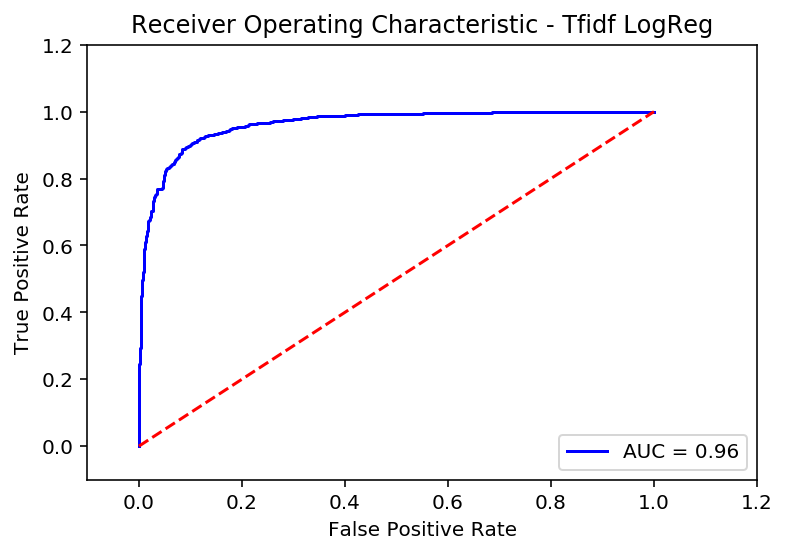

In [50]:
 
from sklearn.metrics import roc_curve, auc
 
# you don't want the predictions/labels
# you want predicted probabilities. predicted probabilities
# from estimator.predict_proba(X) come out in a 2 column array.
# You'll want the 2nd column since that is the one that refers to 
# the positive (1) class. 
pp = clf.predict_proba(tfidf_test)[:,0]
false_p_rate, true_p_rate, thresholds = roc_curve(y_test_bin, pp)
roc_auc = auc(false_p_rate, true_p_rate)
 
plt.title('Receiver Operating Characteristic - Tfidf LogReg')
plt.plot(false_p_rate, true_p_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Count Vectorizer model (bag of words)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

no_features = 1000

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 
# Transform the test set 
count_test = count_vectorizer.transform(X_test)


## Naive Bayes:

In [52]:

count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB() 

clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cr = metrics.classification_report(y_test, pred, labels=['FAKE', 'REAL'])
print cr


cm = metrics.confusion_matrix(y_test, pred, labels=["FAKE","REAL"])
pd.DataFrame(cm)

accuracy:   0.884
             precision    recall  f1-score   support

       FAKE       0.93      0.84      0.88      1056
       REAL       0.85      0.93      0.89      1023

avg / total       0.89      0.88      0.88      2079



0    1
0  883  173
1   69  954

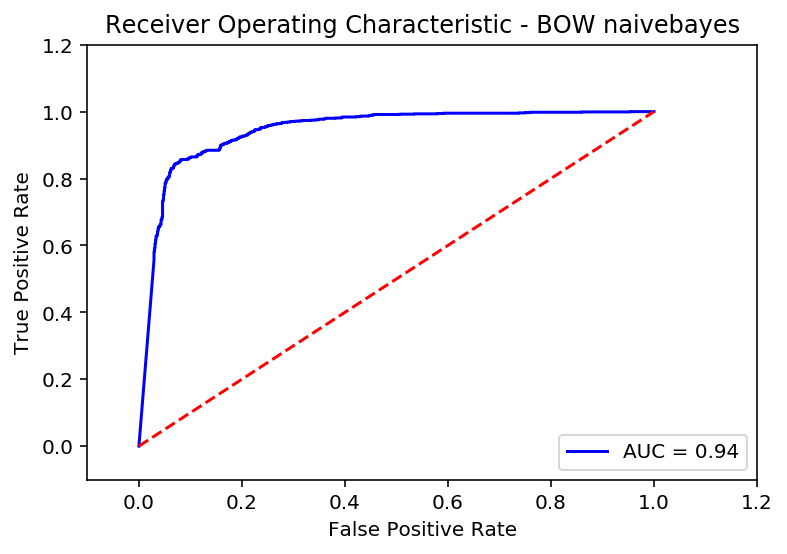

In [53]:
 
from sklearn.metrics import roc_curve, auc
 
# you don't want the predictions/labels
# you want predicted probabilities. predicted probabilities
# from estimator.predict_proba(X) come out in a 2 column array.
# You'll want the 2nd column since that is the one that refers to 
# the positive (1) class. 
pp = clf.predict_proba(count_test)[:,0]
false_p_rate, true_p_rate, thresholds = roc_curve(y_test_bin, pp)
roc_auc = auc(false_p_rate, true_p_rate)
 
plt.title('Receiver Operating Characteristic - BOW naivebayes')
plt.plot(false_p_rate, true_p_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression:

In [54]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression()

clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)


print("accuracy:   %0.3f" % score)
cr = metrics.classification_report(y_test, pred, labels=['FAKE', 'REAL'])
print cr


cm = metrics.confusion_matrix(y_test, pred, labels=["FAKE","REAL"])
pd.DataFrame(cm)

accuracy:   0.919
             precision    recall  f1-score   support

       FAKE       0.92      0.92      0.92      1056
       REAL       0.92      0.92      0.92      1023

avg / total       0.92      0.92      0.92      2079



0    1
0  971   85
1   83  940

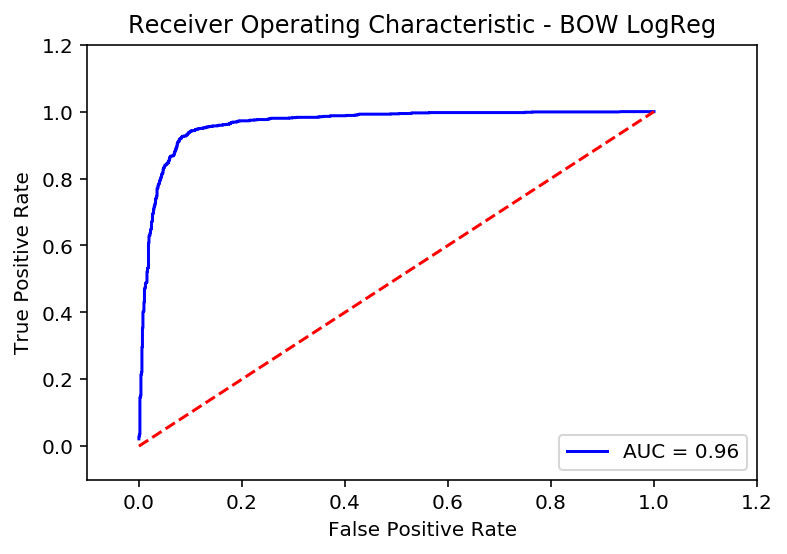

In [55]:
 
from sklearn.metrics import roc_curve, auc
 
# you don't want the predictions/labels
# you want predicted probabilities. predicted probabilities
# from estimator.predict_proba(X) come out in a 2 column array.
# You'll want the 2nd column since that is the one that refers to 
# the positive (1) class. 
pp = clf.predict_proba(count_test)[:,0]
false_p_rate, true_p_rate, thresholds = roc_curve(y_test_bin, pp)
roc_auc = auc(false_p_rate, true_p_rate)
 
plt.title('Receiver Operating Characteristic - BOW LogReg')
plt.plot(false_p_rate, true_p_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
clf.coef_[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

# Unrelated Data

In [10]:
# use on unrelated data
kaggle_df = pd.read_csv("./fake_kaggle.csv")

kaggle_df = kaggle_df[kaggle_df.text != " "]
kaggle_df["label"] = "FAKE"
y_test = kaggle_df.label

kaggle_txt = kaggle_df.text
kaggle_txt = kaggle_txt.apply(lambda val: str(val).replace("\n","").decode("utf-8"))

In [11]:

from sklearn.feature_extraction.text import CountVectorizer

no_features = 1000

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 
# Transform the test set 
count_test = count_vectorizer.transform(kaggle_txt)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression()

clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)

print("accuracy:   %0.3f" % score)
cr = metrics.classification_report(y_test, pred, labels=['FAKE', 'REAL'])

print cr


cm = metrics.confusion_matrix(y_test, pred, labels=["FAKE","REAL"])
pd.DataFrame(cm)

accuracy:   0.937
             precision    recall  f1-score   support

       FAKE       1.00      0.94      0.97     12893
       REAL       0.00      0.00      0.00         0

avg / total       1.00      0.94      0.97     12893



/Users/Stav/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0    1
0  12078  815
1      0    0

In [37]:
len(clf.coef_[0])

57337

In [41]:
clf.coef_.shape

(1, 57337)

In [42]:
pd.DataFrame(count_vectorizer.get_feature_names(), clf.coef_[0])

0
-1.795848e-01          00
-2.328892e-01         000
 7.233303e-05        0000
 1.065904e-02   000000031
 1.206074e-03       00006
 2.318767e-07      0001pt
 2.471970e-07        0002
-2.841348e-05  000billion
 2.120421e-02       000ft
-3.260783e-04       000km
-3.736717e-07        000x
-2.102127e-05         001
 3.751887e-04         002
 3.045157e-03         003
 9.190452e-05         004
-3.367258e-02        004s
-3.721273e-05         005
-2.249889e-06       00684
-3.381936e-02        006s
-2.209942e-03         007
-1.909410e-02        007s
 2.479317e-05         008
-4.251322e-03        008s
-1.913066e-04         009
 3.451112e-06        0099
-1.141585e-02        00am
-6.576947e-03         00p
-9.060061e-02          01
-1.268626e-07         010
 5.239159e-05         011
...                   ...
 2.345517e-06       שנדרש
 2.345517e-06         שני
 2.345517e-06         שעת
 2.345517e-06         שתי
 2.345517e-06      תאמצנה
 2.345517e-06       תוצאה
 2.345517e-06         תחל
 2.345517e-06      תיירות
 2.345517e-06       תנותק
 2.345517e-06       תעודת
 2.345517e-06       תתרכז
-2.440529e-08          أن
-2.440529e-08       إجلاء
-2.440529e-08       الأمر
-2.440529e-08      الجرحى
-2.440529e-08     الدولية
-1.481391e-01    القادمون
-2.440529e-08      اللجنة
-2.440529e-08       تحتاج
-2.440529e-08       تعرفه
-2.440529e-08        تنجح
-2.440529e-08         حلب
-2.440529e-08          عن
-2.440529e-08          لم
-2.440529e-08          ما
-2.440529e-08     محاولات
-2.440529e-08          من
-2.440529e-08         هذا
-2.440529e-08     والمرضى
-5.929784e-08       ยงade

[57337 rows x 1 columns]